In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import classification_report

In [449]:
power_four_schools = [
    # SEC
    "Alabama", "Arkansas", "Auburn", "Florida", "Georgia",
    "Kentucky", "LSU", "Ole Miss", "Mississippi State",
    "Missouri", "South Carolina", "Tennessee", "Texas A&M",
    "Texas", "Vanderbilt", "Oklahoma",
    
    # Big Ten
    "Illinois", "Indiana", "Iowa", "Maryland", "Michigan",
    "Michigan State", "Minnesota", "Nebraska", "Northwestern",
    "Ohio State", "Penn State", "Purdue", "Rutgers", "UCLA",
    "USC", "Oregon", "Washington", "Wisconsin",
    
    # Big 12
    "Arizona State", "Arizona", "Baylor", "BYU", "UCF",
    "Cincinnati", "Colorado", "Houston", "Iowa State", 
    "Kansas", "Kansas State", "Oklahoma State", "TCU",
    "Texas Tech", "Utah", "West Virginia",
    
    # ACC
    "Boston College", "California", "Clemson", "Duke", "Florida State",
    "Georgia Tech", "Louisville", "Miami", "NC State",
    "North Carolina", "Pittsburgh", "Syracuse", "Stanford",
    "Virginia", "Virginia Tech", "Wake Forest", "SMU",
    
    # Others
    "Notre Dame", "Washington State", "Oregon State"
]

major_schools = [
    "Alabama", "Auburn", "Florida", "Georgia",
    "LSU", "Ole Miss",
    "Missouri", "Tennessee", "Texas A&M",
    "Texas", "Oklahoma",
    
    # Big Ten
    "Illinois", "Indiana", "Iowa", "Michigan",
    "Michigan State", "Nebraska",
    "Ohio State", "Penn State",
    "USC", "Oregon", "Washington", "Wisconsin",
    
    # Big 12
    "Iowa State", "Texas Tech", "Utah"
    
    # ACC
    "Clemson", "Florida State", "Miami", 
    
    # Others
    "Notre Dame"
]

In [450]:
hires = pd.read_csv("coach_hires_2019-25.csv")
num_successes = len(hires.loc[hires["success"] == "True"])
num_TBD = len(hires.loc[hires["success"] == "TBD"])
num_unsuccessful = len(hires.loc[hires["success"] == "False"])

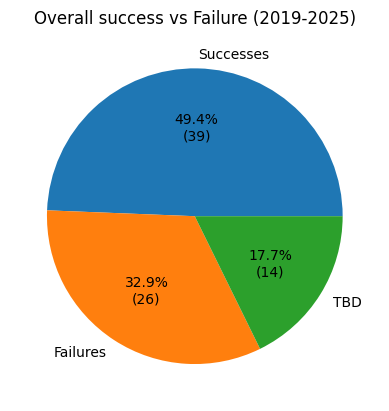

In [451]:
labels = 'Successes', 'Failures', 'TBD'
sizes = [num_successes, num_unsuccessful, num_TBD]

plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(sizes) / 100:.0f})')
plt.title("Overall success vs Failure (2019-2025)")
plt.show()

In [452]:
cignetti_hires = hires[hires["type"] == "Cignetti"]
rhule_hires = hires[hires["type"] == "Rhule"]
mcguire_hires = hires[hires["type"] == "McGuire"]
key_hires = hires[hires["type"] == "Key"]
franklin_hires = hires[hires["type"] == "Franklin"]

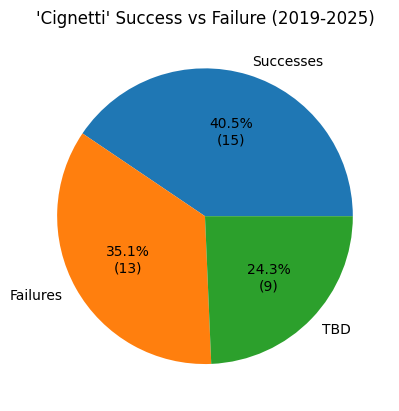

In [453]:
cignetti_num_successes = len(cignetti_hires.loc[cignetti_hires["success"] == "True"])
cignetti_num_TBD = len(cignetti_hires.loc[cignetti_hires["success"] == "TBD"])
cignetti_num_unsuccessful = len(cignetti_hires.loc[cignetti_hires["success"] == "False"])
cignetti_sizes = [cignetti_num_successes, cignetti_num_unsuccessful, cignetti_num_TBD]

plt.pie(cignetti_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(cignetti_sizes) / 100:.0f})')
plt.title("'Cignetti' Success vs Failure (2019-2025)")
plt.show()

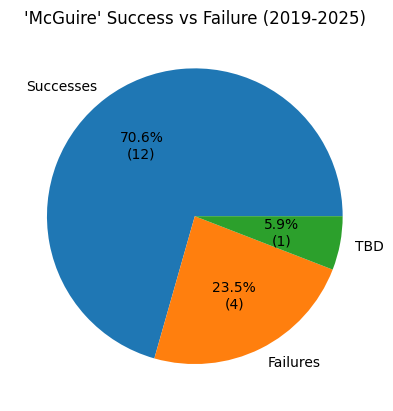

In [454]:
mcguire_num_successes = len(mcguire_hires.loc[mcguire_hires["success"] == "True"])
mcguire_num_TBD = len(mcguire_hires.loc[mcguire_hires["success"] == "TBD"])
mcguire_num_unsuccessful = len(mcguire_hires.loc[mcguire_hires["success"] == "False"])
mcguire_sizes = [mcguire_num_successes, mcguire_num_unsuccessful, mcguire_num_TBD]

plt.pie(mcguire_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(mcguire_sizes) / 100:.0f})')
plt.title("'McGuire' Success vs Failure (2019-2025)")
plt.show()

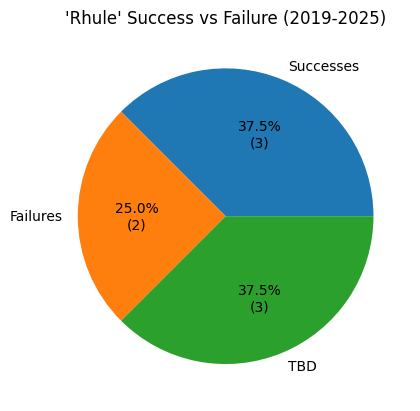

In [455]:
rhule_num_successes = len(rhule_hires.loc[rhule_hires["success"] == "True"])
rhule_num_TBD = len(rhule_hires.loc[rhule_hires["success"] == "TBD"])
rhule_num_unsuccessful = len(rhule_hires.loc[rhule_hires["success"] == "False"])
rhule_sizes = [rhule_num_successes, rhule_num_unsuccessful, rhule_num_TBD]

plt.pie(rhule_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(rhule_sizes) / 100:.0f})')
plt.title("'Rhule' Success vs Failure (2019-2025)")
plt.show()

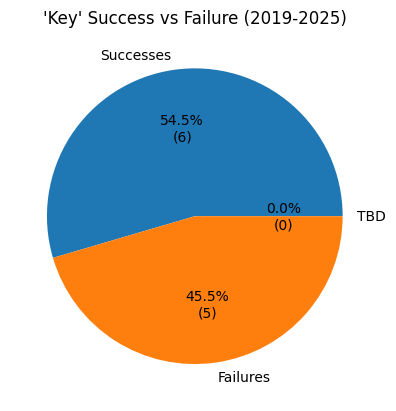

In [456]:
key_num_successes = len(key_hires.loc[key_hires["success"] == "True"])
key_num_TBD = len(key_hires.loc[key_hires["success"] == "TBD"])
key_num_unsuccessful = len(key_hires.loc[key_hires["success"] == "False"])
key_sizes = [key_num_successes, key_num_unsuccessful, key_num_TBD]

plt.pie(key_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(key_sizes) / 100:.0f})')
plt.title("'Key' Success vs Failure (2019-2025)")
plt.show()

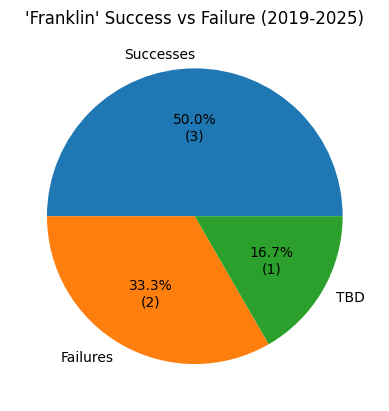

In [457]:
franklin_num_successes = len(franklin_hires.loc[franklin_hires["success"] == "True"])
franklin_num_TBD = len(franklin_hires.loc[franklin_hires["success"] == "TBD"])
franklin_num_unsuccessful = len(franklin_hires.loc[franklin_hires["success"] == "False"])
franklin_sizes = [franklin_num_successes, franklin_num_unsuccessful, franklin_num_TBD]

plt.pie(franklin_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(franklin_sizes) / 100:.0f})')
plt.title("'Franklin' Success vs Failure (2019-2025)")
plt.show()

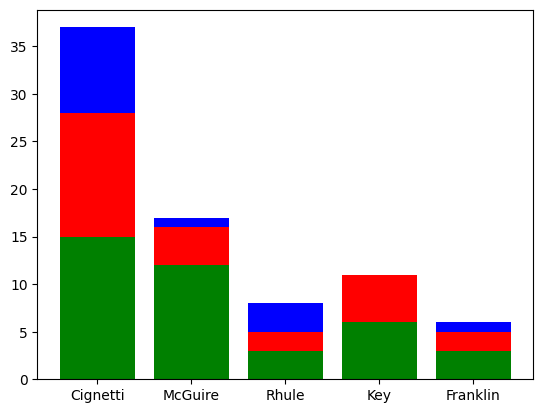

In [458]:
# create data
coach_labels = ['Cignetti', 'McGuire', 'Rhule', 'Key', 'Franklin']
successful_values = np.array([cignetti_num_successes, mcguire_num_successes, rhule_num_successes, key_num_successes, franklin_num_successes])
unsuccessful_values = np.array([cignetti_num_unsuccessful, mcguire_num_unsuccessful, rhule_num_unsuccessful, key_num_unsuccessful, franklin_num_unsuccessful])
TBD_values = np.array([cignetti_num_TBD, mcguire_num_TBD, rhule_num_TBD, key_num_TBD, franklin_num_TBD])

# plot bars in stack manner
plt.bar(coach_labels, successful_values, color='green')
plt.bar(coach_labels, unsuccessful_values, bottom=successful_values, color='red')
plt.bar(coach_labels, TBD_values, bottom=unsuccessful_values+successful_values, color='blue')
plt.show()

In [459]:
small_school_cignetti_hires = cignetti_hires[~cignetti_hires["hired_from"].isin(power_four_schools)]
big_school_cignetti_hires = cignetti_hires[cignetti_hires["hired_from"].isin(power_four_schools)]
major_school_cignetti_hires = cignetti_hires[cignetti_hires["hired_from"].isin(major_schools)]
non_major_school_cignetti_hires = cignetti_hires[~cignetti_hires["hired_from"].isin(major_schools)]


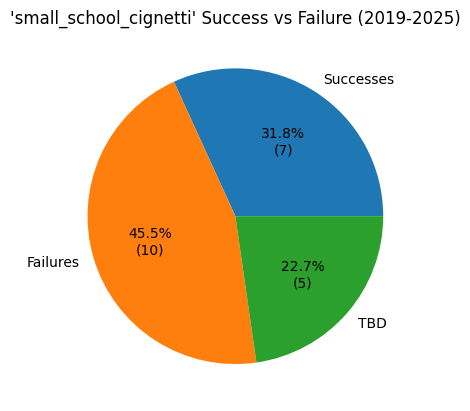

In [460]:
small_school_cignetti_num_successes = len(small_school_cignetti_hires.loc[small_school_cignetti_hires["success"] == "True"])
small_school_cignetti_num_TBD = len(small_school_cignetti_hires.loc[small_school_cignetti_hires["success"] == "TBD"])
small_school_cignetti_num_unsuccessful = len(small_school_cignetti_hires.loc[small_school_cignetti_hires["success"] == "False"])
small_school_cignetti_sizes = [small_school_cignetti_num_successes, small_school_cignetti_num_unsuccessful, small_school_cignetti_num_TBD]

plt.pie(small_school_cignetti_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(small_school_cignetti_sizes) / 100:.0f})')
plt.title("'small_school_cignetti' Success vs Failure (2019-2025)")
plt.show()

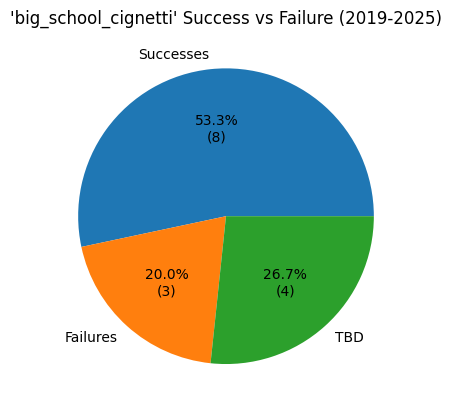

In [461]:
big_school_cignetti_num_successes = len(big_school_cignetti_hires.loc[big_school_cignetti_hires["success"] == "True"])
big_school_cignetti_num_TBD = len(big_school_cignetti_hires.loc[big_school_cignetti_hires["success"] == "TBD"])
big_school_cignetti_num_unsuccessful = len(big_school_cignetti_hires.loc[big_school_cignetti_hires["success"] == "False"])
big_school_cignetti_sizes = [big_school_cignetti_num_successes, big_school_cignetti_num_unsuccessful, big_school_cignetti_num_TBD]

plt.pie(big_school_cignetti_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(big_school_cignetti_sizes) / 100:.0f})')
plt.title("'big_school_cignetti' Success vs Failure (2019-2025)")
plt.show()

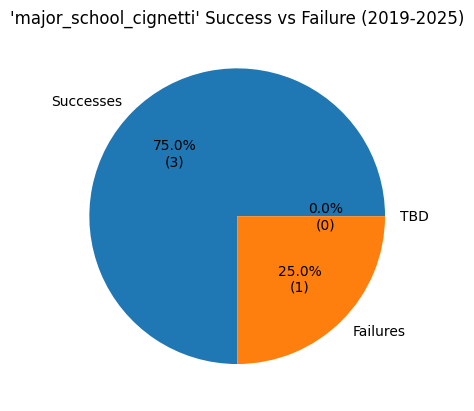

In [462]:
major_school_cignetti_num_successes = len(major_school_cignetti_hires.loc[major_school_cignetti_hires["success"] == "True"])
major_school_cignetti_num_TBD = len(major_school_cignetti_hires.loc[major_school_cignetti_hires["success"] == "TBD"])
major_school_cignetti_num_unsuccessful = len(major_school_cignetti_hires.loc[major_school_cignetti_hires["success"] == "False"])
major_school_cignetti_sizes = [major_school_cignetti_num_successes, major_school_cignetti_num_unsuccessful, major_school_cignetti_num_TBD]

plt.pie(major_school_cignetti_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(major_school_cignetti_sizes) / 100:.0f})')
plt.title("'major_school_cignetti' Success vs Failure (2019-2025)")

plt.show()

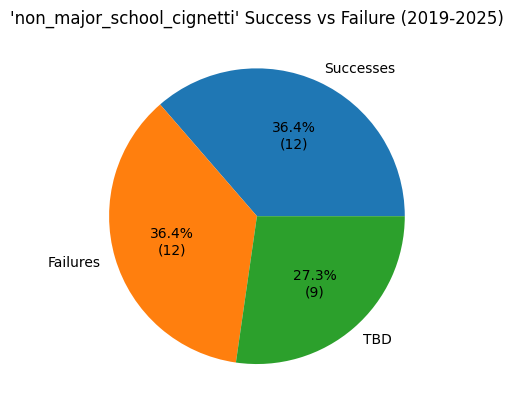

In [463]:
non_major_school_cignetti_num_successes = len(non_major_school_cignetti_hires.loc[non_major_school_cignetti_hires["success"] == "True"])
non_major_school_cignetti_num_TBD = len(non_major_school_cignetti_hires.loc[non_major_school_cignetti_hires["success"] == "TBD"])
non_major_school_cignetti_num_unsuccessful = len(non_major_school_cignetti_hires.loc[non_major_school_cignetti_hires["success"] == "False"])
non_major_school_cignetti_sizes = [non_major_school_cignetti_num_successes, non_major_school_cignetti_num_unsuccessful, non_major_school_cignetti_num_TBD]

plt.pie(non_major_school_cignetti_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(non_major_school_cignetti_sizes) / 100:.0f})')
plt.title("'non_major_school_cignetti' Success vs Failure (2019-2025)")
plt.show()

In [464]:
former_p4_or_nfl_hires = hires[hires["prior_p4_or_nfl_hc"] == True]
non_former_p4_or_nfl_hires = hires[hires["prior_p4_or_nfl_hc"] == False]

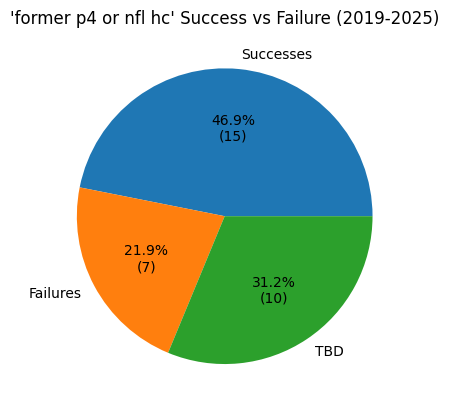

In [465]:
former_p4_or_nfl_num_successes = len(former_p4_or_nfl_hires.loc[former_p4_or_nfl_hires["success"] == "True"])
former_p4_or_nfl_num_TBD = len(former_p4_or_nfl_hires.loc[former_p4_or_nfl_hires["success"] == "TBD"])
former_p4_or_nfl_num_unsuccessful = len(former_p4_or_nfl_hires.loc[former_p4_or_nfl_hires["success"] == "False"])
former_p4_or_nfl_sizes = [former_p4_or_nfl_num_successes, former_p4_or_nfl_num_unsuccessful, former_p4_or_nfl_num_TBD]

plt.pie(former_p4_or_nfl_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(former_p4_or_nfl_sizes) / 100:.0f})')
plt.title("'former p4 or nfl hc' Success vs Failure (2019-2025)")
plt.show()

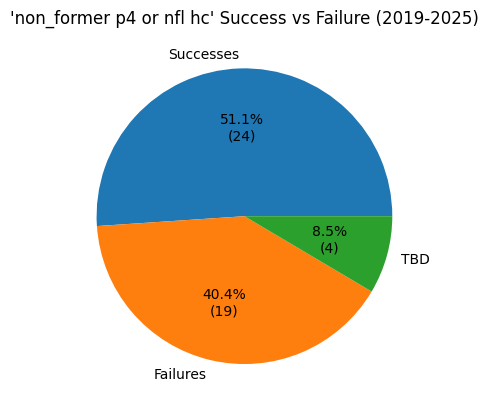

In [466]:
non_former_p4_or_nfl_num_successes = len(non_former_p4_or_nfl_hires.loc[non_former_p4_or_nfl_hires["success"] == "True"])
non_former_p4_or_nfl_num_TBD = len(non_former_p4_or_nfl_hires.loc[non_former_p4_or_nfl_hires["success"] == "TBD"])
non_former_p4_or_nfl_num_unsuccessful = len(non_former_p4_or_nfl_hires.loc[non_former_p4_or_nfl_hires["success"] == "False"])
non_former_p4_or_nfl_sizes = [non_former_p4_or_nfl_num_successes, non_former_p4_or_nfl_num_unsuccessful, non_former_p4_or_nfl_num_TBD]

plt.pie(non_former_p4_or_nfl_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(non_former_p4_or_nfl_sizes) / 100:.0f})')
plt.title("'non_former p4 or nfl hc' Success vs Failure (2019-2025)")
plt.show()

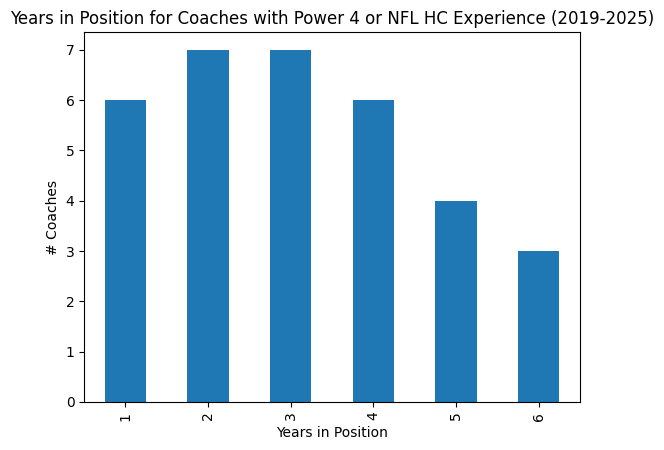

In [467]:
pd.Series(former_p4_or_nfl_hires["years_in_pos"]).value_counts().sort_index().plot(kind="bar")
plt.xlabel("Years in Position")
plt.ylabel("# Coaches")
plt.title("Years in Position for Coaches with Power 4 or NFL HC Experience (2019-2025)")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

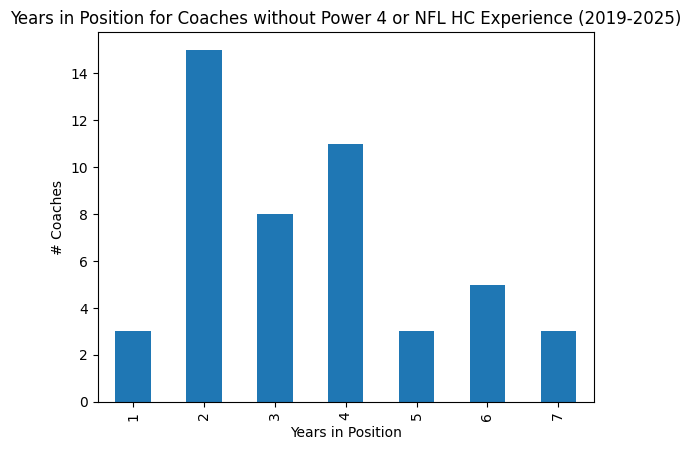

In [468]:
pd.Series(non_former_p4_or_nfl_hires["years_in_pos"]).value_counts().sort_index().plot(kind="bar")
plt.xlabel("Years in Position")
plt.ylabel("# Coaches")
plt.title("Years in Position for Coaches without Power 4 or NFL HC Experience (2019-2025)")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [469]:
former_hc_hires = hires[(hires["prior_p4_or_nfl_hc"] == True) | (hires["type"] == "Cignetti")]
non_former_hc_hires = hires[~((hires["prior_p4_or_nfl_hc"] == True) | (hires["type"] == "Cignetti"))]

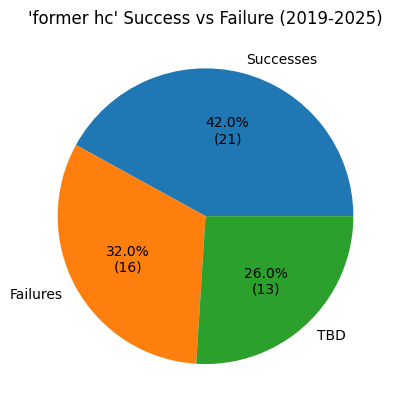

In [470]:
former_hc_num_successes = len(former_hc_hires.loc[former_hc_hires["success"] == "True"])
former_hc_num_TBD = len(former_hc_hires.loc[former_hc_hires["success"] == "TBD"])
former_hc_num_unsuccessful = len(former_hc_hires.loc[former_hc_hires["success"] == "False"])
former_hc_sizes = [former_hc_num_successes, former_hc_num_unsuccessful, former_hc_num_TBD]

plt.pie(former_hc_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(former_hc_sizes) / 100:.0f})')
plt.title("'former hc' Success vs Failure (2019-2025)")
plt.show()

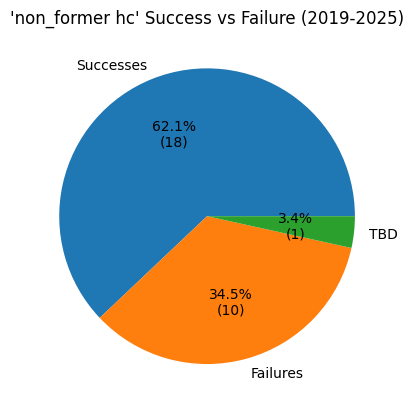

In [471]:
non_former_hc_num_successes = len(non_former_hc_hires.loc[non_former_hc_hires["success"] == "True"])
non_former_hc_num_TBD = len(non_former_hc_hires.loc[non_former_hc_hires["success"] == "TBD"])
non_former_hc_num_unsuccessful = len(non_former_hc_hires.loc[non_former_hc_hires["success"] == "False"])
non_former_hc_sizes = [non_former_hc_num_successes, non_former_hc_num_unsuccessful, non_former_hc_num_TBD]

plt.pie(non_former_hc_sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p * sum(non_former_hc_sizes) / 100:.0f})')
plt.title("'non_former hc' Success vs Failure (2019-2025)")
plt.show()

In [472]:
former_p4_or_nfl_hires[former_p4_or_nfl_hires["years_in_pos"] == 2]

,coach,team,years_in_pos,fired,current,success,type,hired_from,prior_p4_or_nfl_hc
0,Kalen DeBoer,Alabama,2,False,True,True,Cignetti,Washington,True
8,Bill O'Brien,Boston College,2,False,True,TBD,Rhule,New England Patriots,True
16,Manny Diaz,Duke,2,False,True,True,Franklin,Miami,True
27,Les Miles,Kansas,2,True,False,False,Franklin,LSU,True
36,Jonathan Smith,Michigan State,2,False,True,TBD,Cignetti,Oregon State,True
63,Mike Elko,Texas A&M,2,False,True,True,Cignetti,Duke,True
72,Jedd Fisch,Washington,2,False,True,TBD,Cignetti,Arizona,True


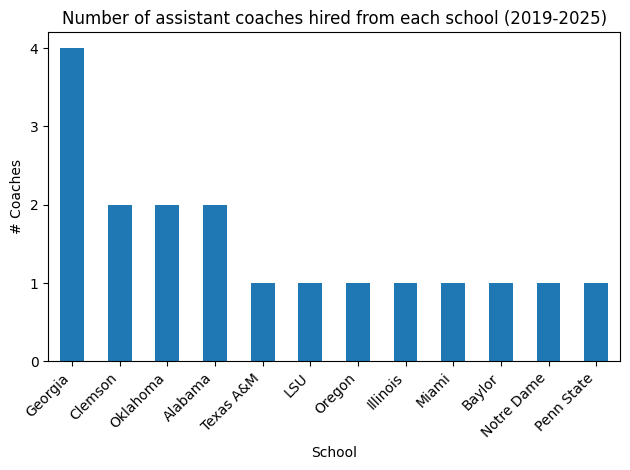

In [473]:
pd.Series(mcguire_hires["hired_from"]).value_counts().plot(kind="bar")
plt.xlabel("School")
plt.ylabel("# Coaches")
plt.title("Number of assistant coaches hired from each school (2019-2025)")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(rotation=45, ha="right")  # ha="right" prevents overlap
plt.tight_layout()  # make room for slanted labels
plt.show()


In [474]:
temp = pd.read_csv("temp.csv")
hires["year_hired"] = temp["year_hired"]

In [475]:
lr_hires = hires[hires['success'] != "TBD"]
lr_hires = lr_hires[lr_hires["success"].notna()]

In [476]:
type = pd.get_dummies(lr_hires["type"], drop_first=True)
lr_hires = pd.concat([lr_hires, type], axis=1)
X = lr_hires[["prior_p4_or_nfl_hc", "Franklin", "McGuire", "Rhule", "Key"]]
y = lr_hires["success"]
y = np.where(y == 'True', True, False)
lr_model = linear_model.LinearRegression().fit(X,y)
predicted_success_perc = pd.DataFrame(lr_model.predict(X), columns=['predicted_success_perc'])
lr_hires = lr_hires.reset_index(drop=True)
lr_hires = pd.concat([lr_hires, predicted_success_perc], axis=1)
predicted_success = np.where(predicted_success_perc > .5, True, False)
predicted_success = pd.DataFrame(predicted_success, columns=['predicted_success'])
lr_hires = pd.concat([lr_hires, predicted_success], axis=1)

In [477]:
lr_hires
y_real = np.where(lr_hires['success'] == "True", True, False)
y_pred = lr_hires['predicted_success']
conf_mat = metrics.confusion_matrix(y_real, y_pred)
conf_mat

array([[10, 16],
       [ 7, 32]])

In [478]:
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

       False       0.59      0.38      0.47        26
        True       0.67      0.82      0.74        39

    accuracy                           0.65        65
   macro avg       0.63      0.60      0.60        65
weighted avg       0.64      0.65      0.63        65

